03-1 k-최근접 이웃 회귀

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

데이터 준비- 산점도

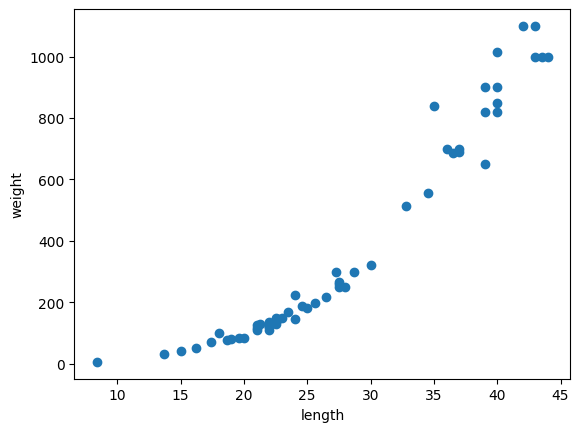

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape) #test_array배열 확인

(4,)


In [5]:
test_array = test_array.reshape(2,2) #크기를 (2,2)로 바꿈
print(test_array.shape)

(2, 2)


In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


결정계수 R^2

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target) #k-최근접 이웃 회귀 모델 훈련
print(knr.score(test_input, test_target)) #테스트 세트 점수(=정확도)

0.992809406101064


In [8]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input) #테스트 세트에 대한 예측
mae = mean_absolute_error(test_target, test_prediction) #테스트 세트에 대한 평균 절대값 오차
print(mae)

19.157142857142862


과대적합/ 과소적합

In [9]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [11]:
knr.n_neighbors = 3 #이웃개수를 3으로 재설정; 모델을 더 복잡하게 만드는 방법
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) #훈련세트 결정계수의 값이 전보다 증가.

0.9804899950518966


In [13]:
print(knr.score(test_input, test_target)) #훈련>테스트이므로 과소적합 문제 해결

0.9746459963987609


03-2 선형회귀

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [20]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]])) #길이가 50인 농어 무게 예측

[1033.33333333]


k-최근접 이웃의 한계

# ---


 새로운 샘플이 훈련세트 범위를 벗어나면 엉뚱한 값을 예측

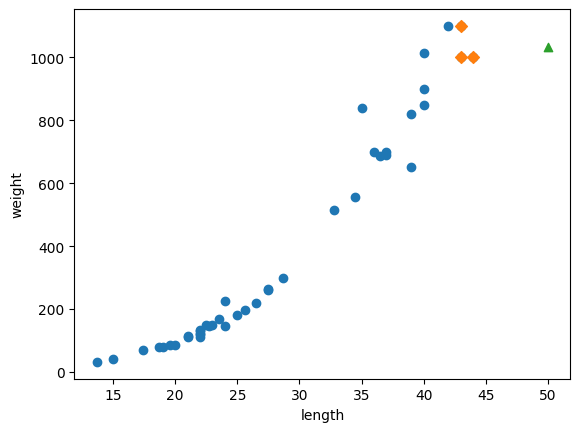

1033.3333333333333
[1033.33333333]


In [23]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) #50 농어 이웃
plt.scatter(train_input, train_target) #훈련세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') #훈련세트 중의 이웃샘플만

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(np.mean(train_target[indexes]))

print(knr.predict([[100]])) #길이가 100인 농어의 예측치도 1033?

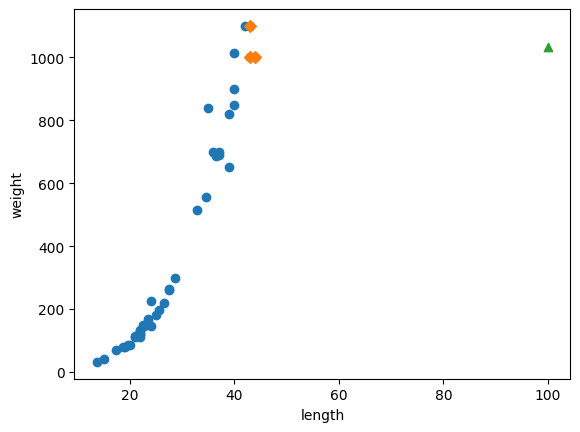

In [24]:
distances, indexes = knr.kneighbors([[100]]) #100 농어의 이웃

plt.scatter(train_input, train_target) #훈련 세트의 산점도

plt.scatter(train_input[indexes], train_target[indexes], marker='D') #훈련세트 중에서 이웃 샘플만 다시

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


선형회귀

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target) #선형모델 훈련

print(lr.predict([[50]])) #50농어에 대한 예측

[1241.83860323]


In [26]:
print(lr.coef_, lr.intercept_) #모델기반학습:  선형식 찾기 위함

[39.01714496] -709.0186449535477


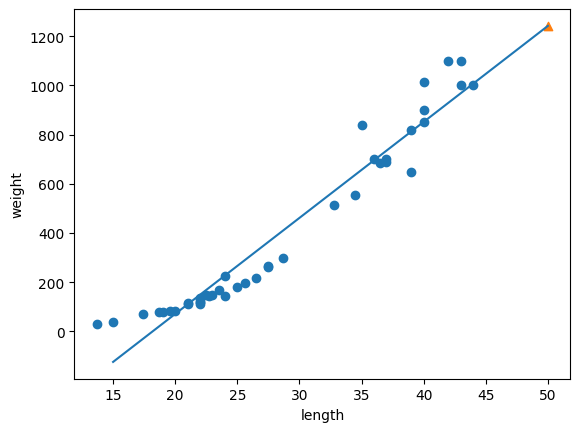

In [29]:
#훈련세트의 산점도
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) #15부터 50까지 1차식 그래프

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
print(lr.score(train_input, train_target)) #훈련
print(lr.score(test_input, test_target)) #테스트

0.939846333997604
0.8247503123313558


다항회귀


In [31]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [32]:
lr = LinearRegression() #열을 두개로 늘릴 때
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [33]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


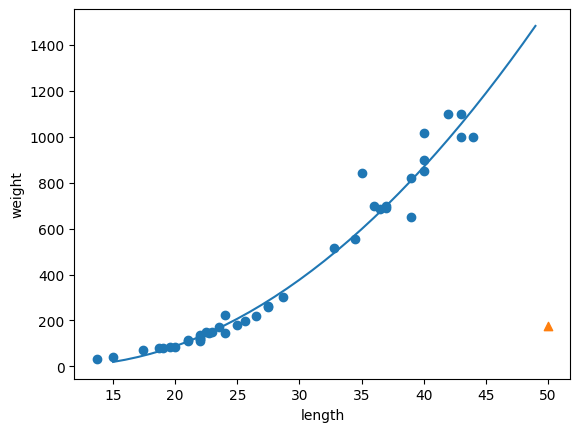

In [34]:
point = np.arange(15, 50) #구간별 직선을 그리기 위한 정수배열

plt.scatter(train_input, train_target) #훈련세트 산점도

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) #2차방정식

plt.scatter(50, 174, marker='^') #50농어데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) #테스트>훈련 : 과소적합

0.9706807451768623
0.9775935108325122


[질문1] K-NN, 선형회귀, 다항회귀 중 어떤 모델을 선택해야되는지에 따른 데이터의 분석 모델 선정 방식이 궁금합니다.

[질문2] 다항회귀의 차수가 높아질수록 모델의 훈련데이터의 각 점에 더 가까워지는 경향성이 있을 것이라 예측합니다. 그렇다면 차수가 높을수록 모델의 정확도가 높아지는지 궁금하며, 아니라면 부가적으로 어떤 것이 고려되어야 다항회귀의 적절한 차수를 찾을수 있는지 알고 싶습니다.